In [1]:
from ultralytics import YOLO
import os
import torch
import glob
import pandas as pd
import matplotlib.pyplot as plt
import math
import torch.nn as nn
import torch.optim as optim
import plot
import distance_estimation
import utils

In [2]:
ROOT = './csv_data/output_dataframes/'

In [3]:
path_dir = os.listdir(ROOT)

In [4]:
path_dir

['2024-02-06-21-34-18_corridor_output_dataframe.csv',
 '2024-02-06-21-40-49_corridor_output_dataframe.csv',
 '2024-02-20-16-34-57_first_floor_output_dataframe.csv',
 '2024-02-20-16-44-28_first_floor_output_dataframe.csv']

In [5]:
df = pd.read_csv(ROOT + path_dir[0])

In [6]:
df

,filename,inference_time,robot_in_the_frame_or_not,detected_or_not,parallel_pixel_dist,size,perp_dist_to_the_robot_pred,dist_to_the_robot_gt,parallel_dist_to_the_robot_gt,perp_dist_to_the_robot_gt,angle
0,1707226458.150496_B.jpg,2073.894978,0,0,NaN,NaN,NaN,1.034557,0.055224,1.033082,1.517392
1,1707226458.206863_F.jpg,92.543840,1,1,-4.724375,116.983077,1.090401,1.034557,0.055224,1.033082,1.517392
2,1707226459.172708_B.jpg,76.322556,0,0,NaN,NaN,NaN,1.037139,0.052962,1.035786,1.519709
3,1707226459.285001_F.jpg,65.485477,1,1,-4.695892,117.103447,1.088999,1.037139,0.052962,1.035786,1.519709
4,1707226460.241386_B.jpg,85.497618,0,0,NaN,NaN,NaN,1.039377,0.053555,1.037996,1.519247
...,...,...,...,...,...,...,...,...,...,...,...
645,1707226780.223442_B.jpg,87.332726,0,0,NaN,NaN,NaN,0.907990,0.097302,0.902761,1.463428
646,1707226781.141347_B.jpg,86.243391,0,0,NaN,NaN,NaN,0.909031,0.098815,0.903644,1.461877
647,1707226781.147182_F.jpg,88.524342,1,1,-24.351586,139.183525,0.919062,0.909031,0.098815,0.903644,1.461877
648,1707226782.123635_B.jpg,84.146261,0,0,NaN,NaN,NaN,0.897551,0.098705,0.892107,1.460602


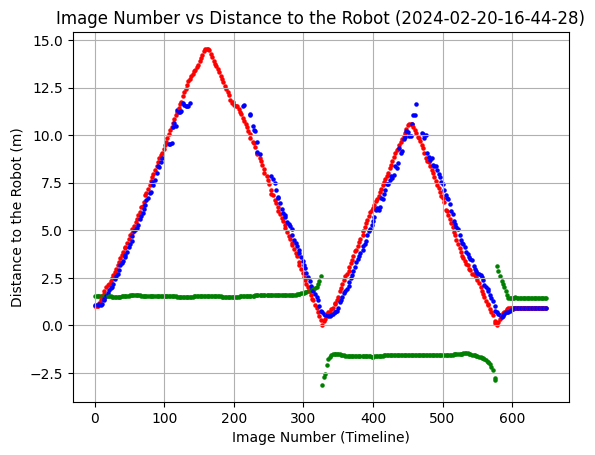

In [7]:
plot.plot_image_number_vs_dist(df)

In [8]:
df['perp_dist_to_the_robot_pred'][400]

5.468748569488525

In [9]:
df['robot_in_the_frame_or_not'][400]

1

In [13]:
df['detected_or_not'][400]

1

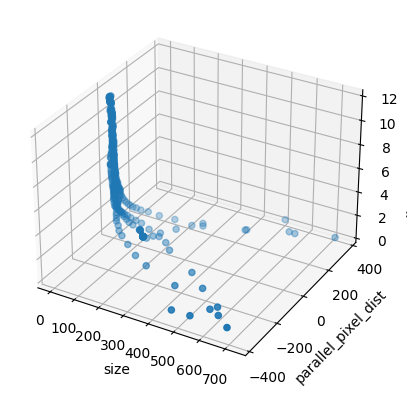

In [29]:
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')

# # Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.scatter3D(df['size'], df['parallel_pixel_dist'], df['perp_dist_to_the_robot_pred'])

# Set labels
ax.set_xlabel('size')
ax.set_ylabel('parallel_pixel_dist')
ax.set_zlabel('perp_dist_to_the_robot_pred')

# Show the plot
plt.show()

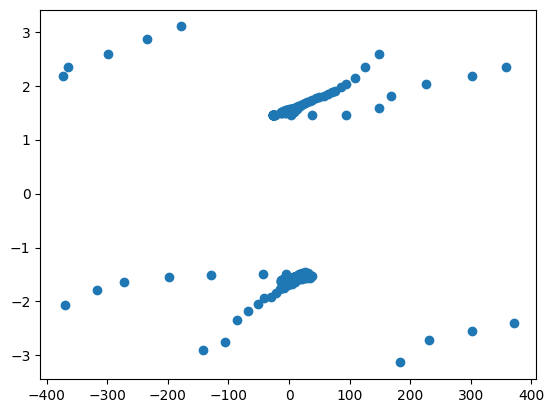

In [30]:
plt.scatter(df['parallel_pixel_dist'], df['angle'])


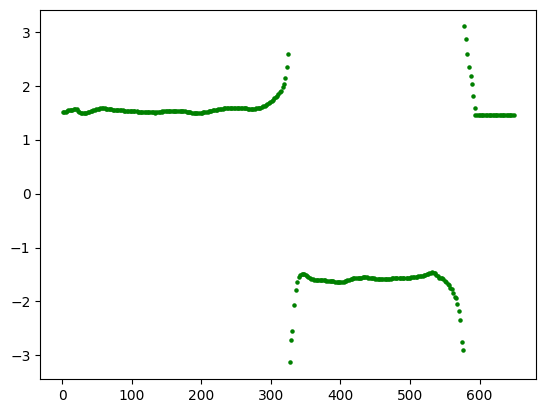

In [31]:
for idx, row in df.iterrows():
    if row['robot_in_the_frame_or_not'] == 1:
        plt.scatter(idx, row['angle'], marker='o', color='g', s=5)